In [287]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# 5.1

In [288]:
df = pd.read_csv("M&M.csv")

In [289]:
df_1 = df.copy()
df_1['Date'] = pd.to_datetime(df_1['Date'])
df_1 = df.set_index('Date')

In [290]:
df_1.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,
15-May-2017,M&amp;M,EQ,1367.85,1373.0,1386.65,1370.0,1374.80,1375.65,1378.31,558190,7.693579e+08,38442,386664,69.27
16-May-2017,M&amp;M,EQ,1375.65,1377.0,1380.50,1363.1,1364.15,1366.35,1371.22,516012,7.075634e+08,29075,334469,64.82
17-May-2017,M&amp;M,EQ,1366.35,1363.0,1384.35,1360.4,1379.00,1378.80,1378.56,920884,1.269497e+09,32299,689649,74.89
18-May-2017,M&amp;M,EQ,1378.80,1369.0,1372.00,1347.5,1347.50,1352.85,1361.70,1217846,1.658344e+09,20476,1043736,85.70
19-May-2017,M&amp;M,EQ,1352.85,1350.0,1357.60,1328.5,1338.20,1333.40,1344.80,976742,1.313522e+09,36297,773590,79.20


#### Calculate Returns and STD

In [291]:
df_1['Daily Returns'] = (df_1['Open Price'] - df_1['Close Price'])/df_1['Open Price']
mean_daily_returns = df_1['Daily Returns'].sum()/len(df_1)
df_1['Varience'] = df_1['Daily Returns'] - mean_daily_returns
sd_entire_stock = np.sqrt((df_1['Varience']**2).sum()/len(df_1))

In [292]:
df_1.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Daily Returns,Varience
Date,,,,,,,,,,,,,,,,
15-May-2017,M&amp;M,EQ,1367.85,1373.0,1386.65,1370.0,1374.80,1375.65,1378.31,558190,7.693579e+08,38442,386664,69.27,-0.001930,-0.004144
16-May-2017,M&amp;M,EQ,1375.65,1377.0,1380.50,1363.1,1364.15,1366.35,1371.22,516012,7.075634e+08,29075,334469,64.82,0.007734,0.005521
17-May-2017,M&amp;M,EQ,1366.35,1363.0,1384.35,1360.4,1379.00,1378.80,1378.56,920884,1.269497e+09,32299,689649,74.89,-0.011592,-0.013806
18-May-2017,M&amp;M,EQ,1378.80,1369.0,1372.00,1347.5,1347.50,1352.85,1361.70,1217846,1.658344e+09,20476,1043736,85.70,0.011797,0.009583
19-May-2017,M&amp;M,EQ,1352.85,1350.0,1357.60,1328.5,1338.20,1333.40,1344.80,976742,1.313522e+09,36297,773590,79.20,0.012296,0.010083


In [293]:
print(f"Mean Daily Returns of Stock: {mean_daily_returns:.3f}")
print(f"Standard Deviation of entire stock returns: {sd_entire_stock:.3f}")

Mean Daily Returns of Stock: 0.002
Standard Deviation of entire stock returns: 0.014


In [294]:
print(f"Annual Returns: {mean_daily_returns*252:.3f}")
print(f"Annual SD/Volatility: {sd_entire_stock*np.sqrt(252):.3f}")

Annual Returns: 0.558
Annual SD/Volatility: 0.225


# 5.2

#### Creating diverse portfolio

Stocks choosen: M&M, BPCL, HDFC, RELIANCE, TITAN

In [347]:
df_1 = pd.read_csv("M&M.csv")
df_2 = pd.read_csv("BPCL.csv")
df_3 = pd.read_csv("BAJFINANCE.csv")
df_4 = pd.read_csv("RELIANCE.csv")
df_5 = pd.read_csv("TITAN.csv")
df_list = [df_1, df_2, df_3, df_4, df_5] # create a list of all 5 stocks

#### Fucntion to calculate annual returns and volatility of a stock

In [348]:
def returns_volatility_stock(df):
    df['Daily Returns'] = (df['Open Price'] - df['Close Price'])/df['Open Price']
    mean_daily_returns = df['Daily Returns'].sum()/len(df)
    df['Varience'] = df['Daily Returns'] - mean_daily_returns
    sum_sqr_var = (df['Varience']**2).sum()
    sd_entire_stock = np.sqrt(sum_sqr_var/len(df))
    ann_rtns = mean_daily_returns*252
    ann_volty = sd_entire_stock*np.sqrt(252)
    rtns_volty_var = [ann_rtns, ann_volty, sum_sqr_var]
    return(rtns_volty_var)

#### Function to calculate annual returns and volatility of portfolio

In [349]:
def returns_volatility_portfolio(wts=[.2, .2, .2, .2, .2]):
    rtns_stocks, volty_stocks, var_stocks = [], [], []
    for df in df_list:
        rtns_stocks.append(returns_volatility_stock(df)[0])
        volty_stocks.append(returns_volatility_stock(df)[1])
        var_stocks.append(returns_volatility_stock(df)[2])
        
    rtns_portfolio, volty_portfolio, var_portfolio = 0, 0, 0
    
    for index, weight in enumerate(wts):
        rtns_portfolio += weight * rtns_stocks[index]
        var_portfolio += weight * var_stocks[index]
    volty_portfolio = np.sqrt(var_portfolio)
    
    rtns_volty_portfolio = [rtns_portfolio, volty_portfolio]
    
    return(rtns_volty_portfolio)

#### Calculating Retuns and Volatility for equal weights

In [352]:
print("==For equal weights(0.2) for all 5 stocks==")
portfolio = returns_volatility_portfolio()
print(f"Annual Returns: {portfolio[0]:.2f}")
print(f"Volatility: {portfolio[1]:.2f}")

==For equal weights(0.2) for all 5 stocks==
Annual Returns: 0.22
Volatility: 0.39


# 5.3

#### Generating all combinations of weight values for 5 stocks

In [353]:
import itertools

weight_lst= []
lst = list(range(1, 10))
combinations = itertools.combinations_with_replacement(lst, 5)
for tple in combinations:
    if np.sum(tple) == 10:
        lst = list(tple)
        new_lst = [(element/10) for element in lst]
        perm_lst = itertools.permutations(new_lst)
        unq_perm_lst = set(perm_lst)
        for lst in unq_perm_lst:
            weight_lst.append(list(lst))

In [354]:
len(weight_lst)

126

#### Calculating Returns and Volatility for each weight combinations

In [355]:
dict_portfolio = {'returns': [],
                 'volatility': [],
                 'sharpe ratio': []}

In [356]:
for weight in weight_lst:
    rtns_volty = returns_volatility_portfolio(weight)
    dict_portfolio['returns'].append(rtns_volty[0])
    dict_portfolio['volatility'].append(rtns_volty[1])
    dict_portfolio['sharpe ratio'].append(rtns_volty[0]/rtns_volty[1])

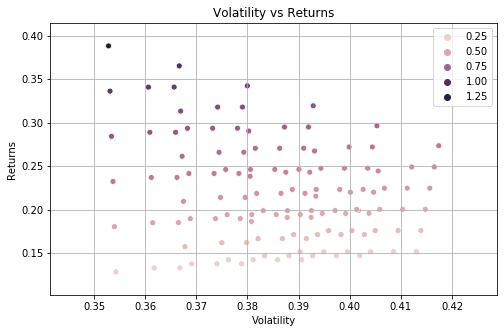

In [357]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=dict_portfolio['volatility'], y=dict_portfolio['returns'], hue=dict_portfolio['sharpe ratio'])
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.title('Volatility vs Returns')
plt.show()